In [2]:
import pandas as pd

data = {
    "ID": [0,1,2,3,4,5,6,7,8,9],
    "A": [59, 24, 62, 48, 58, 19, 32, 88, 47,  63],
    "B": [49, 50, 49, 54, 45, 52, 56, 48, 45, 52]
}
df = pd.DataFrame(data)
print(df["A"].mean())
print(df["B"].mean())

50.0
50.0


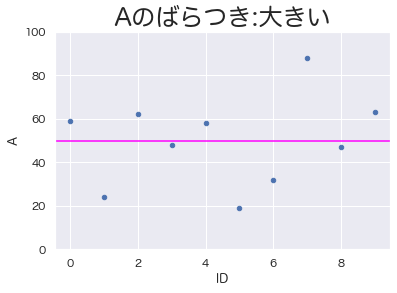

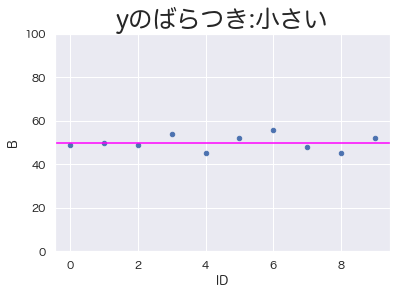

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font=["Meiryo", "Yu Gothic", "Hiragino Maru Gothic Pro"])

df.plot.scatter(x="ID", y="A", color="b", ylim=(0,100))
plt.axhline(y=50, c="Magenta")
plt.title("Aのばらつき:大きい", fontsize=24)
plt.show()

df.plot.scatter(x="ID", y="B", color="b", ylim=(0,100))
# 水平線をy=50の高さにMagentaカラーで引く
plt.axhline(y=50, c="Magenta")
plt.title("yのばらつき:小さい", fontsize=24)
plt.show()

In [9]:
# 分散を求める データフレーム.var()

print(df.var())

ID      9.166667
A     430.666667
B      12.888889
dtype: float64


In [10]:
# 標準偏差を求める データフレーム.std()
print(df.std())

ID     3.02765
A     20.75251
B      3.59011
dtype: float64


In [13]:
# 68%の範囲内を調べる
meanA = df["A"].mean()
stdA =df["A"].std()

print(meanA - stdA, "~", meanA + stdA)

29.247490111635493 ~ 70.7525098883645


In [14]:
meanB = df["B"].mean()
stdB = df["B"].std()
print(meanB - stdB, "~", meanB + stdB)

46.409890128577 ~ 53.590109871423


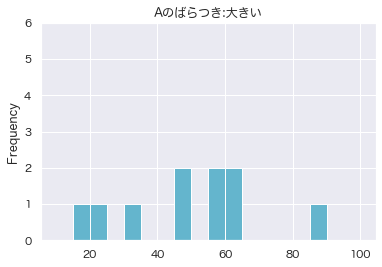

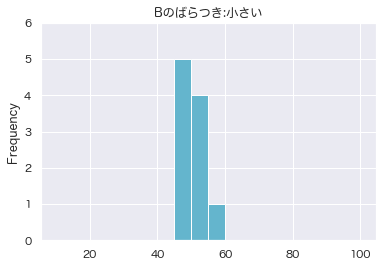

In [18]:
bins = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# ヒストグラムのバーの幅 bins
df["A"].plot.hist(bins=bins, color="c", ylim=(0,6))
plt.title("Aのばらつき:大きい")
plt.show()

df["B"].plot.hist(bins=bins, color="c", ylim=(0,6))
plt.title("Bのばらつき:小さい")
plt.show()

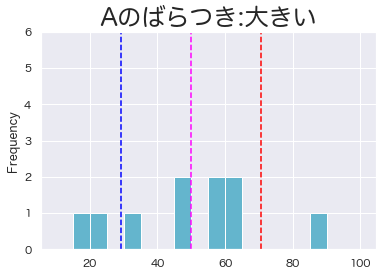

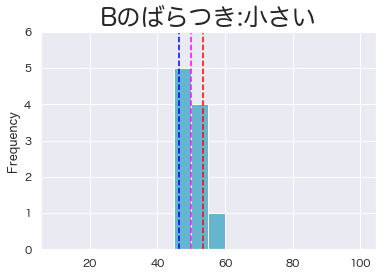

In [31]:
df["A"].plot.hist(bins=bins, color="c", ylim=(0,6))
plt.axvline(meanA, color="Magenta", linestyle="--")
plt.axvline(meanA - stdA, color="blue", linestyle="--")
plt.axvline(meanA + stdA, color="red", linestyle="--")
plt.title("Aのばらつき:大きい", fontsize=24)
plt.show()

df["B"].plot.hist(bins=bins, color="c", ylim=(0,6))
plt.axvline(meanB, color="Magenta", linestyle="--")
plt.axvline(meanB - stdB, color="blue", linestyle="--")
plt.axvline(meanB + stdB, color="red", linestyle="--")
plt.title("Bのばらつき:小さい", fontsize=24)
plt.show()

In [35]:
# 正規分布
# ゴルトンボード
%matplotlib
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["Meiryo", "Yu Gothic", "Hiragino Maru Gothic Pro"])

# ゴルトンボード表示関数：段数、玉数を指定する
def galton(steps, count):
    # 玉が落ちた位置を入れる空のリストを用意する
    ans = []
    # 指定された玉数だけ繰り返す
    for i in range(count):
        # 玉を落とす最初の位置を50にする
        val = 50
        # 指定された段数だけ繰り返す
        for j in range(steps):
            # 0か1のランダムで、0なら-1、1なら+1
            if random.randint(0, 1) == 0:
                val = val - 1
            else :
                val = val + 1
        # 最終的に玉が落ちた位置をリストに追加する
        ans.append(val)
        
    # 落下した結果のリストをデータフレームにして
    df = pd.DataFrame(ans)
    # 0列目（落とした結果の列）をヒストグラムで表示
    df[0].plot.hist()
    plt.title(str(steps)+"段:"+str(count)+"個")
    plt.ylabel("")
    plt.show()
    
galton(10, 10000)    

Using matplotlib backend: MacOSX


In [37]:
# 正規分布用関数のライブラリ scipy.stats
# 累積分布関数 norm.cdf(x=調べたい値, loc=平均値, scale=標準偏差)
from scipy.stats import norm

mean = 166.8
std = 5.8
value = 160.0

cdf = norm.cdf(x=value, loc=mean, scale=std)
print(value, "は、下から", cdf*100, "%")

160.0 は、下から 12.051548220947089 %


In [38]:
from scipy.stats import norm

mean = 166.8
std = 5.8
value = 178.0

cdf = norm.cdf(x=value, loc=mean, scale=std)
print(value, "は上から", (1-cdf)*100, "%")

178.0 は上から 2.6739394108996173 %


In [42]:
# 全体の下から〇〇%にあたる値は何か？ norm.ppf(q=パーセント値, loc=平均値, scale=標準偏差)
from scipy.stats import norm

per = 0.20
mean = 166.8
std = 5.8

ppf = norm.ppf(q=per, loc=mean, scale=std)
print("下から", per*100, "%の値は、", ppf, "です。")

下から 20.0 %の値は、 161.9185968452771 です。


In [44]:
# 全体の上から〇〇%にあたる値は何か？ norm.ppf(q=パーセント値, loc=平均値, scale=標準偏差)
from scipy.stats import norm

per = 0.01
mean = 166.8
std = 5.8

ppf = norm.ppf(q=(1-per), loc=mean, scale=std)
print("下から", per*100, "%の値は、", ppf, "です。")

下から 1.0 %の値は、 180.2928176694369 です。


In [47]:
from scipy.stats import norm

scoreM = 60.0
meanM = 50
stdM = 5

scoreE = 80.0
meanE = 70
stdE = 8

cdfM = norm.cdf(x=scoreM, loc=meanM, scale=stdM)
print(scoreM, "は上から", (1-cdfM)*100, "%")

cdfE = norm.cdf(x=scoreE, loc=meanE, scale=stdE)
print(scoreE, "は上から", (1-cdfE)*100, "%")

60.0 は上から 2.275013194817921 %
80.0 は上から 10.564977366685536 %


In [56]:
# 正規分布になっていることが標準偏差の前提
# ヒストグラムの作成 + もしもデータがもっとたくさんあったらどうなるか（カーネル密度推定） 
# sns.distplot(df["列名"], fit=norm, fit_kws={"color":"色"} )
# plt.show()

%matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set(font=["Meiryo", "Yu Gothic", "Hiragino Maru Gothic Pro"])

df = pd.DataFrame({
    "A" : np.random.randint(0, 100, 1500),
    # random.normal(平均値, 標準偏差, 個数)
    "B" : np.random.normal(50, 10, 1500)
})

sns.distplot(df["A"], fit=norm, fit_kws={'color':'red'})
plt.title("かたよりのないランダムな値")
plt.show()

sns.distplot(df["B"], fit=norm, fit_kws={'color':'red'})
plt.title("正規分布になるようなランダムな値")
plt.show()

Using matplotlib backend: MacOSX


/Users/ryotamiyake/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ryotamiyake/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
